# **Data Science do Zero (Noções fundamentais com Python)**

-----------------------

Esse notebook é baseado ná prática de estudo do livro de Data Science de Joel Grus, as anotações feitas aqui podem ser fieis ao livro ou ser alteradas por motivos de estudos, então os exemplos utilizados servem para trilhar um caminho no aprendizado de Data Science.

-----------------------
[Github do Livro](https://github.com/joelgrus/data-science-from-scratch?tab=readme-ov-file)

-------------------



## **Dados**

> "Dados! Dados! Dados!", esbravejou, impaciente. "Não posso fazer tijolos sem barro." - Arthur Conan Doyle.


Nosso mundo atual está repleto de dados, a cada segundo que se passa a internet acumula mais e mais dados em aplicações e redes sociais, cada passo que damos gera um dado, como nossa localização capturada de nosso smartphone, aparelhos que acompanham batimentos cardiacos.
<br/>
na internet podemos nos encontrar com uma enciclopedia de dados, muitos conjuntos já catalogados prontos para serem estudados.

## **Data Science**

Essa é a area que extrai conhecimento de dados desorganizados.
<br/>
Tendo nela várias sub-áreas:
- Machine Learning
- Análise de Dados
- Business Intelligence

In [47]:
from IPython.display import display

In [48]:
# Análise exemplo para a rede social da DataSciencester

users = [
  { "id": 0, "name": "Hero" },
  { "id": 1, "name": "Dunn" },
  { "id": 2, "name": "Sue" },
  { "id": 3, "name": "Chi" },
  { "id": 4, "name": "Thor" },
  { "id": 5, "name": "Clive" },
  { "id": 6, "name": "Hicks" },
  { "id": 7, "name": "Devin" },
  { "id": 8, "name": "Kate" },
  { "id": 9, "name": "Klein" }
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
 (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [49]:
# Agrupando amigos
friendships = {user["id"]: [] for user in users}

for i, j in friendship_pairs:
  friendships[i].append(j)
  friendships[j].append(i)

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [50]:
# Somando amigos e tirando a média
def number_of_friends(user):
  """Quantos amigos tem o _user_?"""
  user_id = user["id"]
  friend_ids = friendships[user_id]
  return len(friend_ids)

total_connections = sum(number_of_friends(user) for user in users)

num_users = len(users)
avg_connections = total_connections / num_users

print("Média:", avg_connections)

Média: 2.4


In [51]:
# descrobrir quem tem mais amigos
# criando uma lista (user_id, number_of_friends)
number_of_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

number_of_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)
display(number_of_friends_by_id)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [52]:
# cientista de dados que você talvez conheça
def foaf_ids_bad(user):
  """foaf significa  'friend of friend' [amigo de um amigo]"""
  return list(set([foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id] if foaf_id != user["id"]]))

foaf_ids_bad(users[0])

[1, 2, 3]

In [53]:
# contagem de amigos em comum
from collections import Counter

def friends_of_friends(user):
  """Amigos em comum!"""
  user_id = user["id"]
  return Counter(
      foaf_id
      for friend_id in friendships[user_id]
      for foaf_id in friendships[friend_id]
      if foaf_id != user_id
      and foaf_id not in friendships[user_id]
  )

friends_of_friends(users[3])

Counter({0: 2, 5: 1})

In [54]:
# usuarios com os mesmos interesses
def data_scientists_who_like(target_interest):
  """Encontre os ids dos usuários com o mesmo interesse."""
  return [ user_id
            for user_id, user_interest in interests
           if user_interest == target_interest ]

# funciona, mas tem que buscar na lista inteira a cada interesse
data_scientists_who_like("Java")

[0, 5, 9]

In [55]:
# melhorando a busca sobre interesses
# -----------
# aqui criamos dois dicts que indexam
# os interesses pelo id do usuario ou
# os ids dos usuarios pelo interesse

from collections import defaultdict

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

print("Usuários por interesse:")
display(user_ids_by_interest)

interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

print("Interesses por usuários:")
display(interests_by_user_id)

Usuários por interesse:


defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

Interesses por usuários:


defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [56]:
def most_common_interests_with(user):
  return Counter(
      interested_user_id
      for interest in interests_by_user_id[user["id"]]
      for interested_user_id in user_ids_by_interest[interest]
      if interested_user_id != user["id"]
  )

most_common_interests_with(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [57]:
# trazendo lista de possiveis amigos
# removendo os que já são amigos
possible_friend = [ user_id
                      for user_id in
                      list(most_common_interests_with(users[0])) + list(friends_of_friends(users[0]))
                      if user_id not in friendships[0] ]

display(possible_friend)

[9, 8, 5, 3]

In [58]:
# lista anonima de salario e anos de experiência
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
 (48000, 0.7), (76000, 6),
 (69000, 6.5), (76000, 7.5),
 (60000, 2.5), (83000, 10),
 (48000, 1.9), (63000, 4.2)]

In [59]:
# criando dicionario de salario por ano de experiência
# aqui a chave são os anos de experiência e o valor
# é uma lista com os salários por ano de experiência
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

display(salary_by_tenure)

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [60]:
#  Aqui é outrs lista que a chave é os anos de experiência
# e o valor é a média salarial nesse tempo
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

display(average_salary_by_tenure)

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [61]:
# criando buckets de experiências
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

In [62]:
# agora vamos agrupar os salarios por bucket
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

display(salary_by_tenure_bucket)

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [63]:
# agora podemos tirar uma média salarial por bucket
average_salary_by_bucket = {
    bucket: sum(salaries) / len(salaries)
    for bucket, salaries in salary_by_tenure_bucket.items()
}

display(average_salary_by_bucket)

percent = round(((average_salary_by_bucket["more than five"] - average_salary_by_bucket["less than two"]) /average_salary_by_bucket["less than two"]) * 100)
print(f"\nDiferença percentual de salário: {percent}%")

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}


Diferença percentual de salário: 65%


In [64]:
# quais são os tópicos de interesse?
words_and_counts = Counter( word
                             for user, interest in interests
                             for word in interest.lower().split() )

display(words_and_counts)

Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 3,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [65]:
for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [66]:
# uma pausa para ver coisas novas, como por exemplo testes

# verdadeiro
try:
  assert 1 + 1 == 2, "1 + 1 should equal 2 but didn't"
except Exception as e:
  print(f"Error: {e}")

# falso
try:
  assert 1 + 1 == 3, "1 + 1 should equal 2 but didn't"
except Exception as e:
  print(f"Error: {e}")

# testando funções
def sumNumber(numberOne, numberTwo):
  return numberOne + numberTwo

# verdadeiro
try:
  assert sumNumber(5, 5) == 10, "sumNumber(5, 5) should equal 10 but didn't"
except Exception as e:
  print(f"Error: {e}")

# falso
try:
  assert sumNumber(5, 6) == 10, "sumNumber(5, 5) should equal 10 but didn't"
except Exception as e:
  print(f"Error: {e}")

Error: 1 + 1 should equal 2 but didn't
Error: sumNumber(5, 5) should equal 10 but didn't


### **Visualizando Dados**
Aqui iniciamos o uso de ferramentas para visualizarmos os dados, nesse exemplo utilizaremos o MatPlotLib.

In [67]:
# importando o módulo pyplot
from matplotlib import pyplot as plt

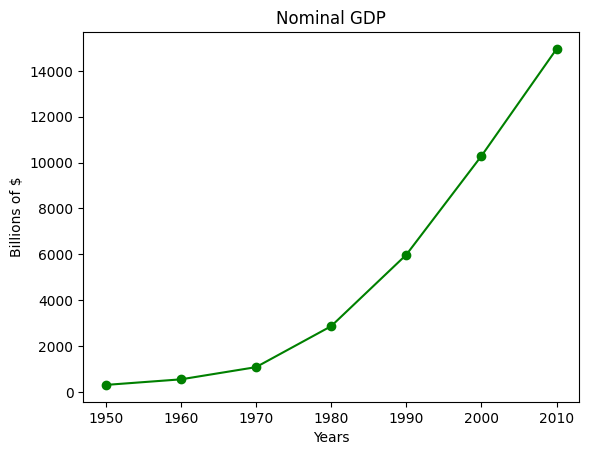

In [68]:
# exemplo de utilização do pyplot

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# criando o gráfico
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# adicione um titulo
plt.title('Nominal GDP')

# adicione um rótulo ao eixo y
plt.ylabel("Billions of $")
plt.xlabel("Years")
plt.show()

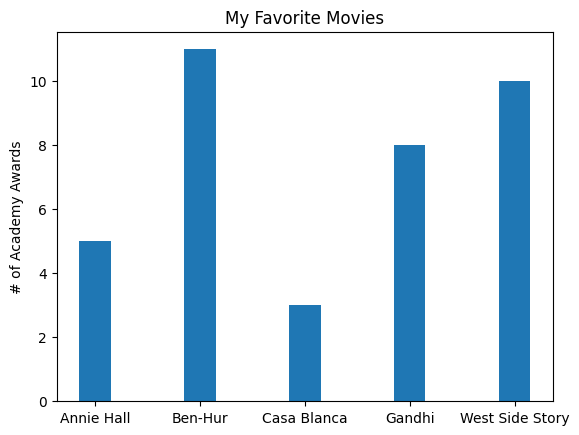

In [69]:
# agora um exemplo do gráfico de barras
movies = ["Annie Hall", "Ben-Hur", "Casa Blanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# criando gráfico de barras
plt.bar(range(len(movies)), num_oscars, 0.3)

# personalizando o gráfico
plt.title("My Favorite Movies")
plt.ylabel("# of Academy Awards")

# rotule o eixo x com os nomes dos filmes nos centros das barras
plt.xticks(range(len(movies)), movies)
plt.show()

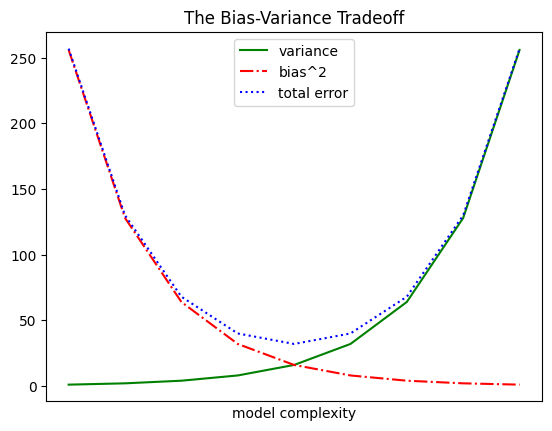

In [70]:
# gráficos de linhas
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

plt.plot(xs, variance, 'g-', label='variance')
plt.plot(xs, bias_squared, 'r-.', label='bias^2')

plt.plot(xs, total_error, 'b:', label='total error')

plt.legend(loc=9)
plt.xlabel('model complexity')
plt.xticks([])
plt.title('The Bias-Variance Tradeoff')
plt.show()

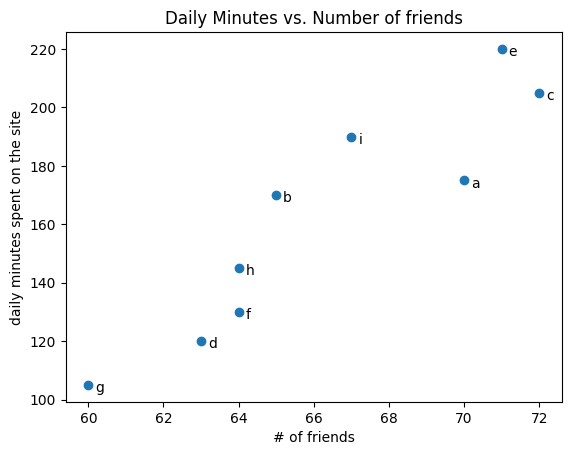

In [71]:
# Gráfico de Dispersão
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

for label, friend_count, minute_count in zip(labels, friends, minutes):
  plt.annotate(label,
               xy=(friend_count, minute_count),
               xytext=(5, -5),
               textcoords='offset points')

plt.title('Daily Minutes vs. Number of friends')
plt.xlabel('# of friends')
plt.ylabel('daily minutes spent on the site')
plt.show()

## **Algebra Linear**

Aprendendo um pouco sobre essa area que é muito importante para o Data Science.
Em python puro as ferramentas para lidar com algebra linear, como por exemplo vetores, não existem, a não ser que usemos algumas bibliotecas, no nosso caso vamos implementar as ferramentas para aprender mais sobre.

In [72]:
from typing import List, Tuple, Callable
from math import sqrt
# *Todas as ferramentas que vamos criar abaixo podem ser encontradas prontas
# no numpy, ou no pandas que possui o numpy em sua composição.

# Vetor type
Vector = List[float]

# Matrix type
Matrix = List[List[float]]

# soma de vetores
def add(v: Vector, w: Vector):
  """Soma os elementos correspondentes!"""
  assert len(v) == len(w), "vectors should be the same length."
  return [v_i + w_i for v_i, w_i in zip(v, w)]

# teste: add
assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9], "Return should be [5, 7, 9]."

# subtração de vetores
def subtract(v: Vector, w: Vector):
  """Subtrai os elementos correspondentes!"""
  assert len(v) == len(w), "vectors should be the same length."
  return [v_i - w_i for v_i, w_i in zip(v, w)]

# teste: subtract
assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3], "Return should be [1, 2, 3]."

# soma de lista de vetores
def vector_sum(vectors: List[Vector]):
  """Soma todos os elementos correspondentes"""
  assert vectors, "no vectors provided"

  num_elements = len(vectors[0])
  assert all(len(v) == num_elements for v in vectors), "different vector size!"

  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

# teste: vector_sum
assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20], "Return should be [16, 20]."

# multiplicação de vetores
def scalar_multiply(c: float, v: Vector):
  """Multiplica cada elemento por c"""
  return [c * i for i in v]

# teste: scalar_multiply
assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6], "Return should be [2, 4, 6]."

# média dos vetores
def vector_mean(vectors: List[Vector]):
  """Computa média dos elementos"""
  n = len(vectors)
  return scalar_multiply(1/n, vector_sum(vectors))

# teste: vector_mean
assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4], "Return should be [3, 4]."

# produto escalar (dot product)
def dot(v: Vector, w: Vector):
  """Computa v_1 * w_1 + ... + v_n * w_n"""
  assert len(v) == len(w), "vectors must be same length"

  return sum(v_i * w_i for v_i, w_i in zip(v, w))

# teste: dot
assert dot([1, 2, 3], [4, 5, 6]) == 32, "Return shold be equal 32."

# soma dos quadrados de um vetor
def sum_of_squares(v: Vector) -> float:
  """Retorna v_1 * v_1 + ... + v_n * v_n"""
  return dot(v, v)

# teste: sum_of_squares
assert sum_of_squares([1, 2, 3]) == 14, "Return shold be equal 14."

# magnitude do vetor
def magnitude(v: Vector):
  """Retorna a magnitude (ou comprimento) de v"""
  return sqrt(sum_of_squares(v))

# teste: magnitude
assert magnitude([3, 4]) == 5, "Return should be 5"

# distância entre dois vetores
def distance(v: Vector, w: Vector) -> float:
  """Computa a distância entre v e w"""
  return magnitude(subtract(v, w))

# teste: distance
assert distance([1, 2, 3], [1, 2, 3]) == 0.0, "Return should be 0.0"

# revelando linhas e colunas de matriz
def shape(A: Matrix) -> Tuple[int, int]:
  """Retorna (n de linhas de A, n de colunas de A)"""
  num_rows = len(A)
  num_cols = len(A[0])
  return num_rows, num_cols

assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3), "Return should be (2, 3)"

# obtendo linha
def get_row(A: Matrix, i: int) -> Vector:
  """Retorna a linha i de A (como um Vector)"""
  return A[i]

# obtendo coluna
def get_column(A: Matrix, j: int) -> Vector:
  """Retorna a coluna j de A (como um Vector)"""
  return [A_i[j] for A_i in A]

# fazendo uma matriz
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
  """
  Retorna uma matriz num_rows x num_cols
  cuja entrada (i,j) é entry_fn(i, j)
  """
  return [[entry_fn(i,j)
            for j in range(num_cols)]
            for i in range(num_rows)]

# matriz de identidade
def identity_matrix(n: int) -> Matrix:
  """Retorna a matriz de identidade n x n"""
  return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(3) == [[1, 0, 0],
                              [0, 1, 0],
                              [0, 0, 1]]

## **Estatística**

Utilizaremos muito a estátistica para lidar com os dados, então aqui abordaremos alguns aprendizados sobre esse conceito matematico.

In [73]:
# diretamente do github do livro
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

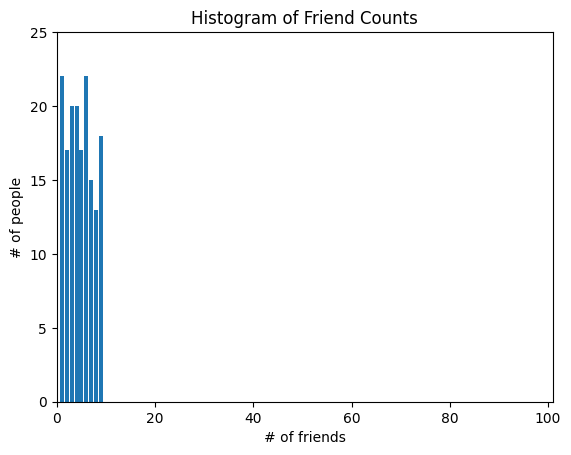

In [74]:
friend_counts = Counter(num_friends)
xs = range(10)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [75]:
num_points = len(num_friends)

In [76]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

In [77]:
# para casos especificos

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

### **Medidas de tendência central**

temos 3 medidas de tendência central média, moda e mediana, elas são tendências que utilizamos para saber sobre o centro de conjuntos de dados.

In [78]:
# função de média
def mean(xs: List[float]) -> float:
  return sum(xs) / len(xs)

mean(num_friends)

7.333333333333333

In [79]:
# mediana
def _median_odd(xs: List[float]) -> float:
  """Se len(xs) for impar, a mediana será o elemento do meio"""
  return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
  """Se len(xs) for par, ela será a média dos dois elementos do meio"""
  sorted_xs = sorted(xs)
  hi_midpoint = len(xs) // 2
  return ((sorted_xs[hi_midpoint - 1]) + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
  """Encontra o valor do meio em v"""
  return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [80]:
print(median(num_friends))

6.0


In [81]:
# quantil
def quantile(xs: List[float], p: float) -> float:
  """Retorna o valor pth-percentil em x"""
  p_index = int(p * len(xs))
  return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [82]:
# moda
def mode(x: List[float]) -> List[float]:
  """Retorna uma lista, pois pode haver mais de uma moda"""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items() if count == max_count]

assert set(mode(num_friends)) == {1, 6}

### **Medidas de Dispersão**

São as medidas utilizadas para saber o quanto os dados estão espalhados, quanto mais próximo de zero menos espalhados estão os dados de um conjunto.

In [83]:
# amplitude
def data_range(xs: List[float]) -> float:
  """Diferença entre o maior e o menor valor"""
  return max(xs) - min(xs)

assert data_range(num_friends) == 99

In [84]:
# variância
def de_mean(xs: List[float]) -> List[float]:
  """Traduza xs subtraindo sua média (para que o resultado tenha média 0)"""
  x_bar = mean(xs)
  return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
  """Quase o desvio quadrado da média"""
  assert len(xs) >= 2, "variance requires at least two elements"

  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

In [85]:
# desvio padrão
def standard_deviation(xs: List[float]) -> float:
  """O desvio-padrão é a raiz quadrada da variância"""
  return sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

In [86]:
# interquartil
# *serve para amenizar os riscos com os outliers
def interquartile_range(xs: List[float]) -> float:
  """Retorna a diferença entre o percentil 75% e o percentil 25%"""
  return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6

# essa operação quase não é influenciada quando há poucos outliers

### **Correlação**

Correlação é a medida de realacionamente entre duas variaveis de conjunto, e como elas se relacionam, podem ser positivas perfeitas (1), negativas perfeitas (-1) ou não relaciondas (0)

In [89]:
# Exemplo do livro sobre minutos gastos dos usuários online
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
daily_hours = [dm / 60 for dm in daily_minutes]

In [92]:
# covariância
# é um tipo de variância aplicada a pares
# mede a variação simultânea de duas variáveis
def covariance(xs: List[float], ys: List[float]):
  assert len(xs) == len(ys), "xs and ys must have same number of elements"
  return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

# essa não é tão comum de ser calculda em comparação com a correlação

In [93]:
#  correlação
# é a divisão dos desvios padrões de duas variaveis
def correlation(xs: List[float], ys: List[float]):
  """Mede a variação simultânea de xs e ys a partir das suas médias"""
  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(xs, ys) / stdev_x / stdev_y
  else:
    return 0

assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

Text(0.5, 0, 'numero de amigos')

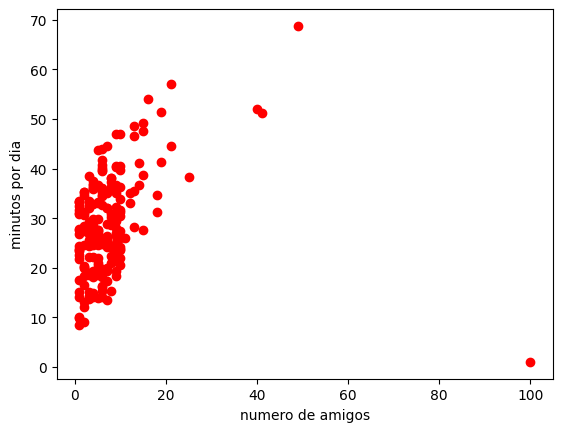

In [106]:
#  gráfico de dispersão do numero de amigos em referência aos
#  minutos gastos por dia
plt.scatter(num_friends,daily_minutes, c='red')
plt.ylabel("minutos por dia")
plt.xlabel("numero de amigos")

In [107]:
#  removendo o outlier
outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]